<a href="https://colab.research.google.com/github/robertomoragad/Estadistica/blob/master/Caso_mejora_Kanban_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importamos librerias
import numpy as np #
from scipy import stats 
import matplotlib.pyplot as plt 


#Caso de estudio 
##mejora del delivery en unidad de BI-BigData

##Introducción

Durante el año 2018 tuve la oportunidad de unirme a una Gerencia de BI-Bigdata en una institución de telecomunicaciones, donde me desempeñé con el rol de Agile Coach.

Una de las actividades que desarrollé en esta organización fue contribuir a modelar las nuevas formas de trabajo (way of working). 

En esta organización introdujimos algunos accionables con el propósito de mejorar la conexión de los equipos y la capacidad de los mismos para acelerar la entrega de productos y la efectividad al negocio (clientes).

<img src='https://drive.google.com/uc?export=view&id=1akl6s-8bZ0m-Fr8XvXKEumLZt1Ox14CH' width="200" align="center" style="margin-right: 20px"> 
<br>

Accionables:
* Entrenamiento en Lean-Agile
* Definición de Propósito de equipos
* Modelar value stream mapping
* Identificar clientes, Stakeholders y tipologías de servicios
* Diseño de equipos y capacity planning
* Incorporar herramienta Jira
* Implementar Kanban (con foco en: visualizar flujo, limitar WIP, métricas de flujo)
* Iteraciones semanales con cadencia organizacional
* Acompañamiento a equipos




<img src='https://drive.google.com/uc?export=view&id=1TJtx2AxUxL3FPe33W1g47DUcbiKaPWul' width="500" align="center" style="margin-right: 20px"> 
<br>


<p style="font-size:8pt"> 
Imagen gentileza de: Roberto Moraga </p>


###Resultados generales
En la siguiente imagen se puede apreciar una gráfica de control con la evolución en el tiempo de la métrica "lead time", que es aquella que nos indica cuánto tiempo demora un producto desde que ingresa al backlog del equipo, hasta que este queda liberado para el cliente.

Las primeras 5 semanas, muestran los datos sin la implementación del nuevo método de trabajo, mientras que las siguientes 5 incorporán los resultados producto de la adopción del método Kanban.

**Gráfico de control** 
<img src='https://drive.google.com/uc?export=view&id=1L17GhDIHs2scDGAfFo9m-ma2QghaBUr-' width="800" align="center" style="margin-right: 20px"> 
<br>

<p style="font-size:8pt"> 
Imagen gentileza de: Roberto Moraga </p>

---
**Estadísticos:**

Antes de Kanban:
* Media leadtime: 24.9
* Sigma leadtime: 19.0
* Throughput semanal: 5.8

Con método Kanban:
* Media leadtime: 8.7
* Sigma leadtime: 5.7
* Throughput semanal: 8.2

Se puede concluir que la incorporación del nuevo Way of working generó:


*   Una reducción de los tiempos de entrega (lead time) en 65%.
*   Un aumento de la velocidad (throughput) de 41%
*   Una dismución de la variabilidad de los tiempos de entrega (leadtime) en 70%.

<img src='https://drive.google.com/uc?export=view&id=1_o4WWCv1a7GA8AuX19lq9OLTyphd4myz' width="300" align="center" style="margin-right: 20px"> 
<br>

<p style="font-size:7pt"> 
Planificación del backlog.  Imagen gentileza de: Roberto Moraga </p>

##Análisis de datos

Veamos en detalle estos resultados y las pruebas estadísticas asociadas, para determinar la relavancia estadística y práctica del efecto generado.

###Cargar data sets

Antes de adoptar Kanban:
-media muestra:  24.924827586206895
-sigma muestra:  19.041295465511954
Con adopción de Kanban:
-media muestra:  8.730975609756097
-sigma muestra:  5.748313580902685


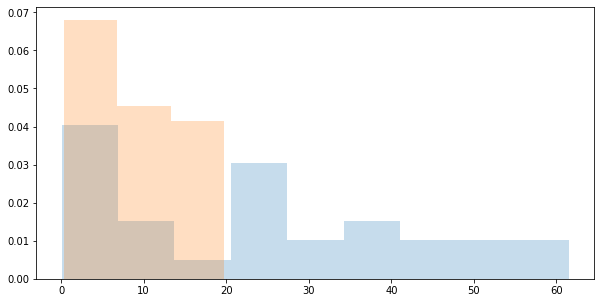

In [ ]:
#cargar data sets de Lead time desde Base de datos Jira
#a: periodo de 5 semanas sin metodo Kanban
#b: periodo de 5 semanas con metodo Kanban

a = (39.12, 22.65, 25.99, 0.40, 40.73, 6.47, 25.26, 11.58, 4.22, 23.65, 44.07, 27.06, 46.23, 53.32, 17.15, 61.51, 7.30, 5.45, 6.85, 2.42, 25.39, 5.21, 10.26, 61.07, 27.77, 54.20, 29.04, 0.08, 38.37)

b = (13.65, 8.87, 9.87, 0.70, 14.10, 3.54, 9.66, 5.36, 2.65, 9.17, 15.03, 10.19, 15.62, 17.55, 7.17, 19.74, 3.85, 3.15, 3.68, 1.85, 9.70, 3.05, 4.90, 19.63, 10.40, 17.79, 10.77, 0.37, 13.44, 18.99, 2.14, 3.95, 11.01, 8.63, 17.26, 3.49, 9.17, 2.14, 3.96, 5.27, 6.51)

#calcular estadisticos data set
xbar_a= np.average(a)
s_a= np.std(a, ddof=1)
print('Antes de adoptar Kanban:')
print('-media muestra: ', xbar_a)
print('-sigma muestra: ', s_a)

xbar_b= np.average(b)
s_b= np.std(b, ddof=1)
print('Con adopción de Kanban:')
print('-media muestra: ', xbar_b)
print('-sigma muestra: ', s_b)

#graficar distribucion de muestras
plt.figure(figsize=(10, 5)) # tamaño gráfico
plt.hist(a, bins=9, density='true', alpha=0.25) # sin kanban
plt.hist(b, bins=3, density='true', alpha=0.25) # con kanban
plt.show()


###Definir umbral para calcular proporción de SLA (service level agreement)
Con solo ver las gráficas de distribución de ambas muestras, podemos darnos cuentas que estas distribuciones son asimétricas y en consecuencia no siguen una distribución Normal.

Por esta razón no podremos realizar un prueba de diferencia de medias con la prueba paramétrica T-Student. 

Aquí tenemos 2 opciones:



1.   Realizar una prueba no paramétrica, por ejemplo de diferencia de medianas.
2.   Realizar una prueba paramétrica de diferencia de proporciones.


Para la opción #1 aplicaremos la prueba no paramétrica de Mann Whitney U, que se aplica a muestras independientes, cuya hipótesis nula es que la distribución de ambas muestras es la misma.
Y su Hipótesis alternativa dice que los valores de una de las muestras tienden a exceder a los de la otra.



In [ ]:
#Prueba No Parametrica, Mann Whitney U , Test de hipotesis diferencia de Medianas
res = stats.mannwhitneyu(a, b, use_continuity=True, alternative='two-sided',method='exact')
print(res)

MannwhitneyuResult(statistic=895.0, pvalue=0.0002471746576377251)


Resultado:

  *Se rechaza la Hipótesis nula, las muestras tienen distribuciones diferentes.*

Para la opción #2 aplicaremos la prueba de Diferencia de proporciones, que es mi favorita, ya que podremos hacer un análisis de 'potencia de prueba' en la eventualidad de que se rechace la Hipótesis nula, misma que indica que las proporciones son iguales.

El punto aquí es que nuestra variable de estudio es el 'lead time', una variable continua del tiempo de entrega, y nosotros necesitamos proporciones para efectuar la Prueba de hipótesis.  Por esta razón es que se definió un umbral máximo para el leadtime, igual a 10 días.  
Gracias a esto fue posible calcular en cada muestra el porcentaje de productos que tuvieron un tiempo de entrega menor o igual a 10 días, y con estas proporciones procedimos a aplicar la Prueba de diferencia de proporciones.

###Calcular proporciones

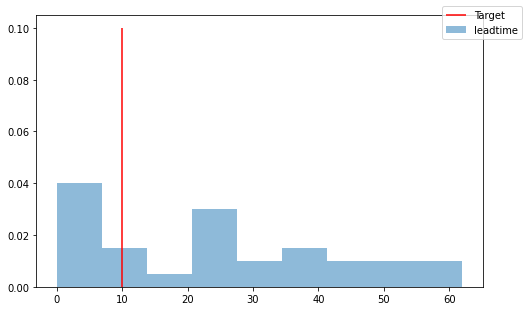

Datos con sistema de trabajo sin kanban  | 1° Momento:
muestra:  29
Cantidad en target:  9
Cumplimiento target:  0.3103448275862069
media:  24.924827586206895
mediana:  25.26
cuartil 3:  39.12
desv. std:  19.041295465511954


In [ ]:
#Umbral Target service time
k = 10 #days

#Momento 1 (sin kanban)
data = a

#Contador cumplimiento Umbral  
count = 0
for i in data : 
    if i <= k : 
        count = count + 1

#calculo estadistica descriptiva
muestra_a = np.size(data)
media_a = np.mean(data)
mediana_a = np.median(data)
per75_a = np.percentile(data, 75)
sigma_a = np.std(data, ddof=1)

#calculo indicador negocio SLA
q_target_a = count
sla_a = count/muestra_a

#Graficar
plt.figure(figsize=(8, 5)) #tamaño grafico
plt.hist(data, bins=9, range=[0, 62], alpha=0.5, density="true")
plt.vlines(ymin=0, ymax=0.1, x=k, colors='r')#Z critico
plt.legend(['Target', 'leadtime'],bbox_to_anchor=(1.1,1.05))
plt.show()

print('Datos con sistema de trabajo sin kanban  | 1° Momento:')
print('muestra: ', muestra_a)
print("Cantidad en target: ", q_target_a)
print("Cumplimiento target: ", sla_a)
print('media: ', media_a)
print('mediana: ', mediana_a)
print('cuartil 3: ', per75_a)
print('desv. std: ', sigma_a)

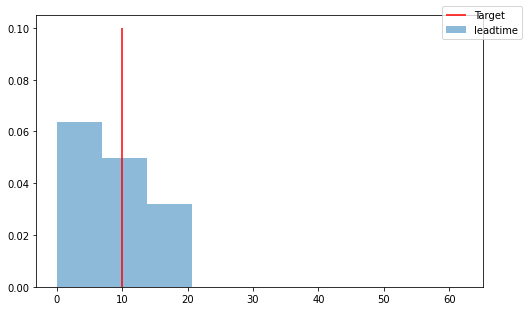

Datos con sistema de trabajo con kanban  | 2° Momento:
muestra:  41
Cantidad en target:  26
Cumplimiento target:  0.6341463414634146
media:  8.730975609756097
mediana:  8.87
cuartil 3:  13.44
desv. std:  5.748313580902685


In [ ]:
#Umbral Target service time
k = 10 #days

#Momento 2 (con kanban)
data = b

#Contador cumplimiento Umbral  
count = 0
for i in data : 
    if i <= k : 
        count = count + 1

#calculo estadistica descriptiva
muestra_b = np.size(data)
media_b = np.mean(data)
mediana_b = np.median(data)
per75_b = np.percentile(data, 75)
sigma_b = np.std(data, ddof=1)

#calculo indicador negocio SLA
q_target_b = count
sla_b = count/muestra_b

#Graficar
plt.figure(figsize=(8, 5)) #tamaño grafico
plt.hist(data, bins=9, range=[0, 62], alpha=0.5, density="true")
plt.vlines(ymin=0, ymax=0.1, x=k, colors='r')#Z critico
plt.legend(['Target', 'leadtime'],bbox_to_anchor=(1.1,1.05))
plt.show()

print('Datos con sistema de trabajo con kanban  | 2° Momento:')
print('muestra: ', muestra_b)
print("Cantidad en target: ", q_target_b)
print("Cumplimiento target: ", sla_b)
print('media: ', media_b)
print('mediana: ', mediana_b)
print('cuartil 3: ', per75_b)
print('desv. std: ', sigma_b)

###Prueba de diferencia de proporciones

Z critico:  1.959963984540054
S diferencia proporciones:  0.11418856798948211
IC diferencia proporciones al 0.95 NC :  -0.5476069945827959 -0.09999603317161951
IC diferencia proporciones al 0.95 NC :  (-0.5476069945827959, -0.09999603317161951)


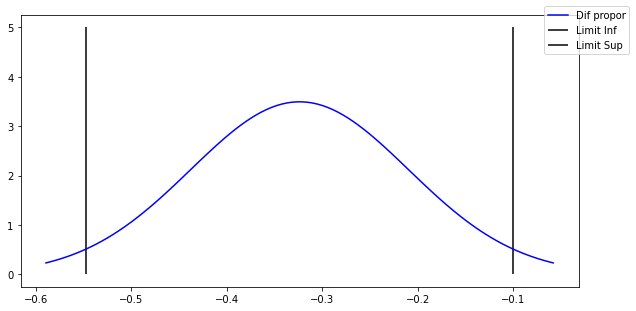

In [ ]:
#Analisis post hoc utilizando prueba de diferencia de 2 proporciones***

## 1) cargar datos muestras: tamaño (n), proporcion (p)
#muestra 1 (control)
n_1 = muestra_a
p_1 = sla_a

#muestra 2 (experimental)
n_2 = muestra_b
p_2 = sla_b


## 2) Determinar Nivel de Significancia
alpha = 0.05


#calcular Z critico 2 colas con Scipy
Zcritico = stats.norm.ppf(1 - (alpha/2))
print ('Z critico: ',Zcritico)

## 3) Estimar el IC de la diferencia de proporciones
#'Sigma diferencias  proporciones' es de la siguiente forma:
#Calcular Desv. Standar de las diferencias de proporciones
Sp_1p_2 = np.sqrt( (p_1*(1-p_1)/n_1) + (p_2*(1-p_2)/n_2))

print('S diferencia proporciones: ',Sp_1p_2)

#IC diferencia proporciones al 1-alpha:
LI = (p_1 - p_2) - Zcritico * Sp_1p_2
LS = (p_1 - p_2) + Zcritico * Sp_1p_2
print('IC diferencia proporciones al', 1-alpha, 'NC : ', LI, LS)

#otra forma con Scipy
IC = stats.norm.interval(1-alpha, loc=p_1 - p_2, scale=Sp_1p_2)
print('IC diferencia proporciones al', 1-alpha, 'NC : ', IC)


#Graficar
#proyectar distribucion diferencia proporciones
dif_prop = stats.norm(p_1 - p_2,Sp_1p_2 )
x_dif_prop = np.linspace(dif_prop.ppf(0.01), dif_prop.ppf(0.99), 100)
pdf_dif_prop = dif_prop.pdf(x_dif_prop) #funcion densidad probabilidad

plt.figure(figsize=(10, 5)) #tamaño grafico
plt.plot(x_dif_prop, pdf_dif_prop,"b", ) #medias h1 fit
plt.vlines(ymin=0, ymax=5, x=LI)#Limite inf
plt.vlines(ymin=0, ymax=5, x=LS)#Limite sup
plt.legend(['Dif propor','Limit Inf', 'Limit Sup'],bbox_to_anchor=(1.1,1.05))
plt.show()

*Resultado: se puede apreciar que el intervalo de Confianza de la diferencia de proporciones no incluye el valor 0.*

In [ ]:
#4) plantear hipotesis
 # H0:  Prop 1 = Prop 2
 # H1:  Prop 1 ≠ Prop 2

#regla decision (2 colas)
 # no rechazar H0 si: -Zcritico <= Z <= Zcritico
 # rechazar HO si: Z < -Zcritico o Z > Zcritico


## 5) Calcular el estadístico Z crítico a emplear
Zcritico = Zcritico #fue obtenido en paso anterior


## 6) Determinar el tipo de test, una o dos colas.
#como la hipotesis alternativa es del tipo “diferente de” se trata de un test de dos colas
#Nota: Se recomienda utilizar el contraste bilateral para estos análisis dado que éstos 
#requieren una mayor diferencia para detectar una misma potencia


## 7 ) Calcular el estadístico Z de prueba

Z = ( p_1 - p_2 - 0) / Sp_1p_2
print('Z prueba: ', Z)

## 8) Calcular el p-value y comparación con el nivel de significancia establecido.
#calcular p-value
pvalue = (stats.norm.cdf(Z)) #Z prueba se encuentra en cola izq
print('p-value (significancia estadística): ', pvalue*2) #2 colas multiplicar por 2

## 9) Concluir prueba de hipotesis:
#como Z prueba se encuetra en la Zona de No Rechazo, es decir dentro de -1,96 y 1,96, No se puede rechazar la H0, las proporciones no son diferentes.
#p-value es mayor al nivel de significancia (alpha= 0.05)

Z prueba:  -2.835673654362957
p-value (significancia estadística):  0.00457291470117414


Resultado:


*debido a que p-value 0.004 es menor al Novel de significancia (alpha= 0.05) pre-seteado, se rechaza la Hipótesis nula, por tanto existen diferencias estadísticamente significativas entre las proporciones muestrales.*

Como se rechaza la Hipótesis nula, es recomendable realizar un análisis de potencia de prueba para medir la relevancia del efecto creado.


X promedio para Z= 1.959963984540054 :  -0.22380548070558823
Beta:  0.19059394357802195
otra forma beta:  0.19059394357802195
Potencia de la prueba:  0.809406056421978
diferencia bruta:  -0.32380151387720774


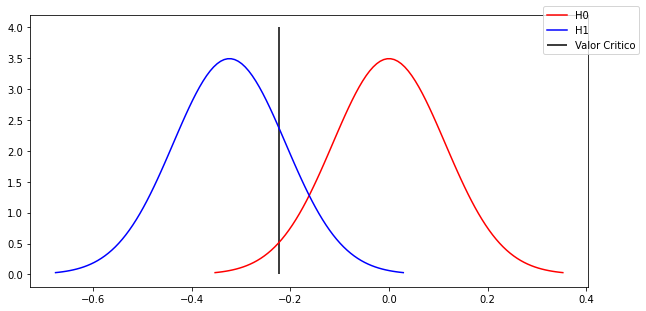

In [ ]:
## 10) Calcular la potencia de la prueba (1 - beta)

#buscar el valor en Porcentaje correspondiente al Z critico
x = 0 - (Zcritico * Sp_1p_2)# por la izquierda
print('X promedio para Z=',Zcritico,': ',x)

#otra forma mas simple con Scipy usando ppf
x_b = stats.norm.ppf((alpha/2), loc=0, scale=Sp_1p_2)
#print('X promedio para Z=',Zcritico,': ',x_b)


#Calcular Beta (error tipo II)
#forma simple con Scipy
beta = 1- stats.norm.cdf(-Zcritico, loc=Z, scale=1)
print('Beta: ',beta)

#otra forma simple para calcular Beta con Scipy
beta1 = 1- stats.norm.cdf(-Zcritico-Z)
print('otra forma beta: ', beta1)

#Calcular Potencia estadística (1- beta)
print('Potencia de la prueba: ', 1-beta)


## 11) Calcular el tamaño del efecto

dif_bruta = (p_1 - p_2)
print('diferencia bruta: ', dif_bruta)


#graficar H0 y H1

#proyectar distribucion diferencias prop H0
H0_dif_prop = stats.norm(0, Sp_1p_2 )
H0_x_dif_prop = np.linspace(H0_dif_prop.ppf(0.001), H0_dif_prop.ppf(0.999), 100)
H0_pdf_dif_prop = H0_dif_prop.pdf(H0_x_dif_prop) #funcion densidad probabilidad

#proyectar distribucion diferencias prop H0
H1_dif_prop = stats.norm(p_1 - p_2, Sp_1p_2 )
H1_x_dif_prop = np.linspace(H1_dif_prop.ppf(0.001), H1_dif_prop.ppf(0.999), 100)
H1_pdf_dif_prop = H1_dif_prop.pdf(H1_x_dif_prop) #funcion densidad probabilidad


plt.figure(figsize=(10, 5)) #tamaño grafico
plt.plot(H0_x_dif_prop, H0_pdf_dif_prop,"r", ) #medias h0 fit
plt.plot(H1_x_dif_prop, H1_pdf_dif_prop,"b", ) #medias h1 fit
plt.vlines(ymin=0, ymax=4, x=x)#Z critico
plt.legend(['H0','H1', 'Valor Critico'],bbox_to_anchor=(1.1,1.05))
plt.show()

###Conclusión

*Podemos concluir que el efecto creado por la implementación del nuevo Way of Working en la organización, tuvo una relevancia estadística y práctica, esto último ya que el aumento de SLA en 32 puntos porcentuales brutos, cuenta con una potencia superior al 80%.*


Por lo tanto se validan las mejoras exhibidas en este estudio.


####Nota:
* SLA antes de kanban: 0.31
* SLA con kanban: 0.63



Prueba adicional para verificar si la reducción de la variabilidad de los tiempos de entrega es estadísticamente significativa:


In [ ]:
#Prueba No parametrica, Levene, Test de hipotesis diferencia de Varianzas
res= stats.levene(a, b, center='median', proportiontocut=0.05)
print(res)

LeveneResult(statistic=37.49809139348904, pvalue=5.1650439223283556e-08)


Por tanto las varianzas son diferentes, la disminución exhibida es estadísticamente significativa.

---------


##Anexo

Prueba paramétrica para diferencia de medias

In [ ]:
#Prueba Parametrica, T-Student 2 muestras independientes, Test de hipotesis diferencia de medias
res = stats.ttest_ind(a, b,  equal_var=False, alternative="two-sided")
print(res)

Ttest_indResult(statistic=4.439025531067535, pvalue=0.00010265058131141083)


Medias son diferentes, pero, recordar que este test se aplica para muestras con distribución Normal. Por tanto no aplica.
